<a href="https://colab.research.google.com/github/GOPIMANISEKARAN/Username-and-password/blob/main/Guvi%20Assessment2B.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###### Assessment

###### I am going to provide two .csv files , you are supposed to work on them and have to provide solutions to the following problems

###### import necessary libraries

In [4]:
import numpy as np
import pandas as pd
df1=pd.read_csv("/college_1.csv")
df2=pd.read_csv("/college_2.csv")
df1.columns.values,df2.columns.values
df1.info(),df2.info()




<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84 entries, 0 to 83
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               84 non-null     object 
 1   python             84 non-null     float64
 2   mysql              84 non-null     float64
 3   Previous Geekions  84 non-null     int64  
 4   CodeKata Score     84 non-null     int64  
 5   Department         84 non-null     object 
 6   Rising             84 non-null     int64  
dtypes: float64(2), int64(3), object(2)
memory usage: 4.7+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35 entries, 0 to 34
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Name                    35 non-null     object
 1   python                  35 non-null     int64 
 2   python_en               35 non-null     int64 
 3   mysql                   35 non-null  

(None, None)

###### merge those two csv files (after getting as dataframes, get them as a single dataframe)

In [5]:
df3=pd.merge(df1,df2,how='outer')
df3

/usr/local/lib/python3.7/dist-packages/pandas/core/reshape/merge.py:1208: UserWarning: You are merging on int and float columns where the float values are not equal to their int representation
  UserWarning,


,Name,python,mysql,Previous Geekions,CodeKata Score,Department,Rising,python_en,computational_thinking
0,A.Dharani,82.0,20.0,24500,24500,Computer Science and Engineering,0,NaN,NaN
1,V.JEEVITHA,82.0,20.0,21740,21740,Computer Science and Engineering,0,NaN,NaN
2,HEMAVATHI.R,100.0,100.0,19680,19680,Computer Science and Engineering,0,NaN,NaN
3,Mugunthan S,100.0,47.0,10610,10610,Computer Science and Engineering,0,NaN,NaN
4,Sathammai.S,100.0,8.0,8980,8980,Computer Science and Engineering,0,NaN,NaN
...,...,...,...,...,...,...,...,...,...
114,praveen raj j,24.0,0.0,2380,2380,Computer Science and Engineering,0,-1.0,0.0
115,AMARNATH D,-1.0,12.0,1890,1890,Electronics and Communication Engineering,0,52.0,-1.0
116,bala,32.0,0.0,1720,1720,Electronics and Communication Engineering,0,49.0,-1.0
117,XY Z,-1.0,-1.0,0,0,Computer Science and Engineering,0,20.0,-1.0


###### Take each csv file , split that csv file into multiple categories (example csv files are added in the repo) 


###### consider if the codekata score exceeds 15000 points(present week) then make a csv on those observations as Exceeded expectations.csv


###### if  10000<codekata score<15000   (Reached_expectations.csv)



###### if  7000<codekata score<10000   (Needs_Improvement.csv)


###### if  codekate score < 7000        (Unsatisfactory.csv)

In [6]:
a=df3['CodeKata Score']>15000
c=df3.loc[a]
c.to_csv('Exceeded expectations.csv')
b=(df3['CodeKata Score']<15000)&(df3['CodeKata Score']>10000)
d=df3.loc[b]
d.to_csv('Reached_expectations.csv')
e=(df3['CodeKata Score']<10000)&(df3['CodeKata Score']>7000)
f=df3.loc[e]
f.to_csv('Needs_Improvement.csv')
g=df3['CodeKata Score']<7000
h=df3.loc[g]
h.to_csv("Unsatisfactory.csv")



In [7]:
A=pd.read_csv("Unsatisfactory.csv")
len(A)

93

###### Average of previous week geekions vs this week geekions (i.e Previous Geekions vs CodeKata Score)

In [8]:
average=['Previous Geekions','CodeKata Score']
df3[average].mean()

Previous Geekions    3842.352941
CodeKata Score       4051.764706
dtype: float64

###### No of students participated 

In [11]:
v=df3['Name'].unique()
len(v)#119 students participated in program

119

###### #Average completion of python course or my_sql or python english or computational thinking

In [18]:
df3.columns.values
g=df3[['python', 'mysql','python_en', 'computational_thinking']]
g.mean()

python                    54.352941
mysql                     23.500000
python_en                 29.657143
computational_thinking     2.200000
dtype: float64

###### rising star of the week (top 3 candidate who performed well in that particular week)

In [30]:
o=df3['Rising'].unique()
o.sort()
Top_performer=df3[df3['Rising']>1990]
Top_performer

,Name,python,mysql,Previous Geekions,CodeKata Score,Department,Rising,python_en,computational_thinking
86,Ganesh Ramkumar R,-1.0,24.0,8790,10790,Computer Science and Engineering,2000,55.0,6.0
92,shifak N,58.0,0.0,5180,8320,Electronics and Electrical Engineering,3140,0.0,0.0
102,Narasimhan Y L,-1.0,0.0,4800,6800,Computer Science and Engineering,2000,-1.0,0.0


###### Shining stars of the week (top 3 candidates who has highest geekions)

In [49]:
df3.columns.values
top=df3.sort_values(by=['Previous Geekions'],ascending=False)
top.head(3)

,Name,python,mysql,Previous Geekions,CodeKata Score,Department,Rising,python_en,computational_thinking
0,A.Dharani,82.0,20.0,24500,24500,Computer Science and Engineering,0,NaN,NaN
1,V.JEEVITHA,82.0,20.0,21740,21740,Computer Science and Engineering,0,NaN,NaN
2,HEMAVATHI.R,100.0,100.0,19680,19680,Computer Science and Engineering,0,NaN,NaN


###### Department wise codekata performence (pie chart)

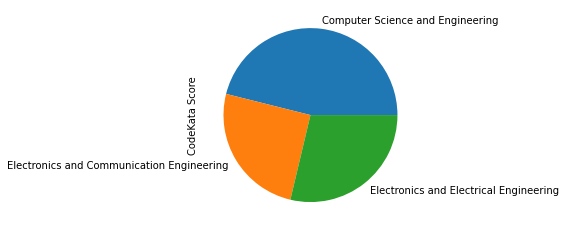

In [67]:
aus=df3.groupby('Department')['CodeKata Score'].mean()
aus.plot.pie()



###### Department wise toppers (horizantal bar graph or any visual representations of your choice)

In [68]:
df3['Department'].unique()

array(['Computer Science and Engineering',
       'Electronics and Communication Engineering',
       'Electronics and Electrical Engineering'], dtype=object)

gg=df3.groupby('Department')['CodeKata Score'].transform(max)==df3['CodeKata Score']
#df3[gg]
#lop=df3['CodeKata Score']==gg
#df3.loc[lop]
df3['CodeKata Score']=df3.groupby('Department')['CodeKata Score'].transform(max)
df3.columns.values





In [120]:

gg=df3.groupby('Department')['CodeKata Score'].transform(max)==df3['CodeKata Score']
df3[gg]
#lop=df3['CodeKata Score']==gg
#df3.loc[lop]
#df3['CodeKata Score max']=df3.groupby('Department')['CodeKata Score'].transform(max)
#df3.groupby('Department')['CodeKata Score max']

,Name,python,mysql,Previous Geekions,CodeKata Score,Department,Rising,python_en,computational_thinking
0,A.Dharani,82.0,20.0,24500,24500,Computer Science and Engineering,0,NaN,NaN
1,V.JEEVITHA,82.0,20.0,21740,24500,Computer Science and Engineering,0,NaN,NaN
2,HEMAVATHI.R,100.0,100.0,19680,24500,Computer Science and Engineering,0,NaN,NaN
3,Mugunthan S,100.0,47.0,10610,24500,Computer Science and Engineering,0,NaN,NaN
4,Sathammai.S,100.0,8.0,8980,24500,Computer Science and Engineering,0,NaN,NaN
...,...,...,...,...,...,...,...,...,...
114,praveen raj j,24.0,0.0,2380,24500,Computer Science and Engineering,0,-1.0,0.0
115,AMARNATH D,-1.0,12.0,1890,10040,Electronics and Communication Engineering,0,52.0,-1.0
116,bala,32.0,0.0,1720,10040,Electronics and Communication Engineering,0,49.0,-1.0
117,XY Z,-1.0,-1.0,0,24500,Computer Science and Engineering,0,20.0,-1.0


In [121]:
df4=pd.merge(df1,df2,how='outer')
df4

/usr/local/lib/python3.7/dist-packages/pandas/core/reshape/merge.py:1208: UserWarning: You are merging on int and float columns where the float values are not equal to their int representation
  UserWarning,


,Name,python,mysql,Previous Geekions,CodeKata Score,Department,Rising,python_en,computational_thinking
0,A.Dharani,82.0,20.0,24500,24500,Computer Science and Engineering,0,NaN,NaN
1,V.JEEVITHA,82.0,20.0,21740,21740,Computer Science and Engineering,0,NaN,NaN
2,HEMAVATHI.R,100.0,100.0,19680,19680,Computer Science and Engineering,0,NaN,NaN
3,Mugunthan S,100.0,47.0,10610,10610,Computer Science and Engineering,0,NaN,NaN
4,Sathammai.S,100.0,8.0,8980,8980,Computer Science and Engineering,0,NaN,NaN
...,...,...,...,...,...,...,...,...,...
114,praveen raj j,24.0,0.0,2380,2380,Computer Science and Engineering,0,-1.0,0.0
115,AMARNATH D,-1.0,12.0,1890,1890,Electronics and Communication Engineering,0,52.0,-1.0
116,bala,32.0,0.0,1720,1720,Electronics and Communication Engineering,0,49.0,-1.0
117,XY Z,-1.0,-1.0,0,0,Computer Science and Engineering,0,20.0,-1.0


In [122]:
ccd=df4.groupby('Department')['CodeKata Score'].transform(max)==df4['CodeKata Score']
df4[ccd]

,Name,python,mysql,Previous Geekions,CodeKata Score,Department,Rising,python_en,computational_thinking
0,A.Dharani,82.0,20.0,24500,24500,Computer Science and Engineering,0,NaN,NaN
84,ASHOK KUMAR K,100.0,31.0,19400,19400,Electronics and Electrical Engineering,0,0.0,9.0
87,Bodipudi Harini,-1.0,35.0,10040,10040,Electronics and Communication Engineering,0,0.0,-1.0
